In [6]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.converters import (
    circuit_to_dag,
    dag_to_circuit,
)
from qiskit.visualization import dag_drawer

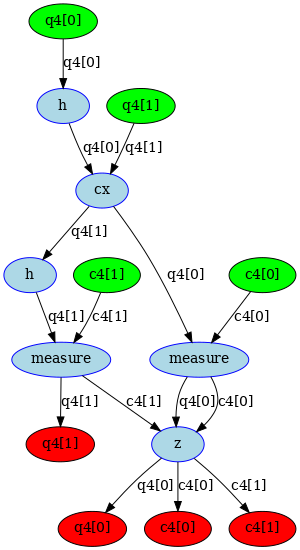

In [17]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
qc.h(0)
qc.cx(0, 1)
qc.h(1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.z(0).c_if(creg, 3)
dag = circuit_to_dag(qc)
dag_drawer(dag)

In [24]:
for node in dag.topological_op_nodes():
    print(node.op.name, node.qargs, node.cargs)
    if node.op.name == "cx":
        print("is_controlled_gate", node.is_controlled_gate())
    if node.op.name == "z":
        print("condition", node.condition)
        target_node = node

h (Qubit(QuantumRegister(2, 'q4'), 0),) ()
cx (Qubit(QuantumRegister(2, 'q4'), 0), Qubit(QuantumRegister(2, 'q4'), 1)) ()
is_controlled_gate True
h (Qubit(QuantumRegister(2, 'q4'), 1),) ()
measure (Qubit(QuantumRegister(2, 'q4'), 0),) (Clbit(ClassicalRegister(2, 'c4'), 0),)
measure (Qubit(QuantumRegister(2, 'q4'), 1),) (Clbit(ClassicalRegister(2, 'c4'), 1),)
z (Qubit(QuantumRegister(2, 'q4'), 0),) ()
condition (ClassicalRegister(2, 'c4'), 3)


In [25]:
# dir(target_node)
target_node.condition

(ClassicalRegister(2, 'c4'), 3)

In [ ]:
from copy import deepcopy
from qiskit.circuit import Operation
from qiskit.dagcircuit import DAGOpNode

new_target_node = deepcopy(target_node)

new_node = DAGOpNode(
    target_node.op,
    target_node.qargs,
    target_node.cargs,
)
new_node.condition

3

In [37]:
target_node.op.__dict__

{'_definition': None,
 '_name': 'z',
 '_num_qubits': 1,
 '_num_clbits': 0,
 '_params': [],
 '_label': None,
 '_condition': (ClassicalRegister(2, 'c4'), 3),
 '_duration': None,
 '_unit': 'dt'}

In [39]:
target_node.op._condition = 3